# Useful Functions

In [51]:
def sum_numbers_in_string(text):
  """
  This function sums all the numbers present in a string.

  Args:
      text: The string containing numbers.

  Returns:
      The sum of all the numbers in the string. If no numbers are found, returns 0.
  """
  total_sum = 0
  current_number = ""
  for char in text:
    if char.isdigit():
      current_number += char
    else:
      if current_number:
        total_sum += int(current_number)
        current_number = ""
  # Add the last number if it exists
  if current_number:
    total_sum += int(current_number)
  return total_sum

# Example usage
string = "This is 10 a test string with 2 numbers 3 and 7."
sum_of_numbers = sum_numbers_in_string(string)
print(f"The sum of all numbers in the string is: {sum_of_numbers}")

The sum of all numbers in the string is: 22


# Telegram Message Dataset Description

This dataset was collected by reading 300 messages from 7 different Telegram groups.

### Data Fields:
- **ID:** A unique identifier for each message.
- **Group:** The name or identifier of the Telegram group from which the message originated.
- **Sender:** The username or identifier of the person who sent the message.
- **Text:** The content of the message.
- **Reply:** The ID of the message to which the current message is a reply (if applicable).
- **Date:** The date and time when the message was sent.
- **Reactions:** Information about any reactions (e.g., likes, emojis) received by the message.

### Manual Labeling:
Each conversation has been manually labeled to differentiate it from others using the "conversation_id" label.

This dataset provides a comprehensive view of interactions within various Telegram groups, allowing for analysis of communication patterns, and other forms of data analysis.


# Statistics on the original dataset

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = pd.read_excel('labeling_data.xlsx')
df = df.set_index('index')
df['date'] = pd.to_datetime(df['date'])

In [54]:
df.head()

,id,group,sender,text,reply,date,reactions,conversation_id,Unnamed: 9
index,,,,,,,,,
1,21738,https://t.me/joinchat/OOC4qk2QS1FM37aETHuzWQ,64987268,"guys hello everyone, I don't know if I'm in th...",NaN,2023-11-14 10:14:46+00:00,{},0,NaN
2,21739,https://t.me/joinchat/OOC4qk2QS1FM37aETHuzWQ,962690321,/search infosec,21738.0,2023-11-14 13:10:56+00:00,{},0,NaN
3,21743,https://t.me/joinchat/OOC4qk2QS1FM37aETHuzWQ,64987268,Thank you,NaN,2023-11-14 13:50:36+00:00,{},0,NaN
4,21749,https://t.me/joinchat/OOC4qk2QS1FM37aETHuzWQ,705891914,For automation how is it?\n#Link,NaN,2023-11-16 10:04:12+00:00,{},1,NaN
5,21750,https://t.me/joinchat/OOC4qk2QS1FM37aETHuzWQ,705891914,Is there any specification on which I can focu...,NaN,2023-11-16 10:05:11+00:00,{},1,NaN


In [55]:
countreactions = df['reactions'].apply(lambda x: sum_numbers_in_string(x))

In [56]:
countreactions.sum()

319

In [57]:
totconversations = df.groupby('conversation_id').count().shape[0]

## Total number of different conversations:

In [58]:
print(totconversations)

535


## Number of messages in a conversation in average:

In [59]:
meanconversationlength = df.shape[0] / totconversations
print(meanconversationlength)

3.9233644859813084


## Number of messages per group:

In [60]:
messagespergroup = df.groupby('group')['group'].count()
print(messagespergroup)

group
https://t.me/PoliGruppo                         300
https://t.me/joinchat/FNGD_0n6IpIbjfJBAZsuoA    300
https://t.me/joinchat/OOC4qk2QS1FM37aETHuzWQ    299
https://t.me/joinchat/RL4pXSkXipyuKDmd          300
https://t.me/joinchat/aiAC6RgOjBRkYjhk          300
https://t.me/joinchat/qyxbq_vZ5f4xYzg0          300
https://t.me/joinchat/rLRXuuItcHtkMTVk          300
Name: group, dtype: int64


## Number of different conversations per group:

In [61]:
conversationspergroup = df.groupby(['group','conversation_id'])['conversation_id'].size()
conversationspergroup = conversationspergroup.groupby('group').count()
print(conversationspergroup)

group
https://t.me/PoliGruppo                         106
https://t.me/joinchat/FNGD_0n6IpIbjfJBAZsuoA     70
https://t.me/joinchat/OOC4qk2QS1FM37aETHuzWQ     44
https://t.me/joinchat/RL4pXSkXipyuKDmd           75
https://t.me/joinchat/aiAC6RgOjBRkYjhk           94
https://t.me/joinchat/qyxbq_vZ5f4xYzg0           26
https://t.me/joinchat/rLRXuuItcHtkMTVk          120
Name: conversation_id, dtype: int64


<Axes: title={'center': '#Different Conversations per group'}, xlabel='group'>

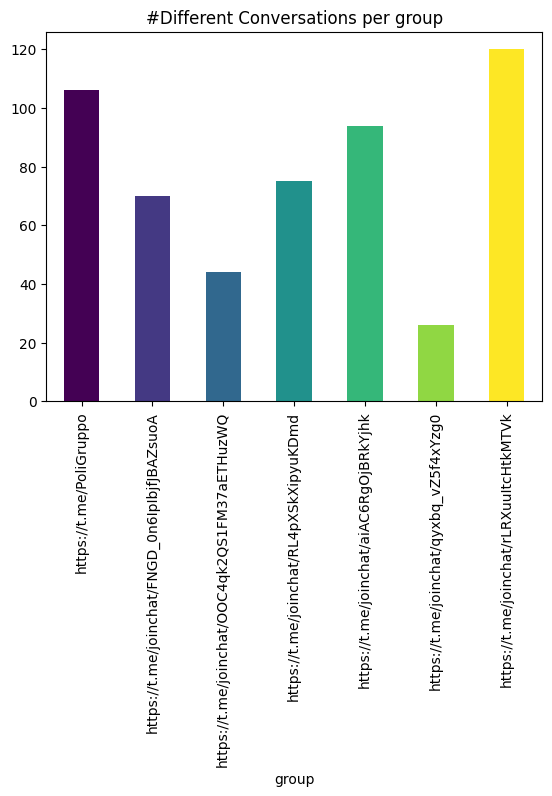

In [62]:
import matplotlib.pyplot as plt

# Generate a list of colors from the colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(conversationspergroup)))

conversationspergroup.plot(kind='bar', title='#Different Conversations per group', color=colors)

## Number of messages in a conversation in average:

In [63]:
lengthofconversationspergroup = 300/conversationspergroup
lengthofconversationspergroup

group
https://t.me/PoliGruppo                          2.830189
https://t.me/joinchat/FNGD_0n6IpIbjfJBAZsuoA     4.285714
https://t.me/joinchat/OOC4qk2QS1FM37aETHuzWQ     6.818182
https://t.me/joinchat/RL4pXSkXipyuKDmd           4.000000
https://t.me/joinchat/aiAC6RgOjBRkYjhk           3.191489
https://t.me/joinchat/qyxbq_vZ5f4xYzg0          11.538462
https://t.me/joinchat/rLRXuuItcHtkMTVk           2.500000
Name: conversation_id, dtype: float64

<Axes: title={'center': 'Average Length of Conversations per group'}, xlabel='group'>

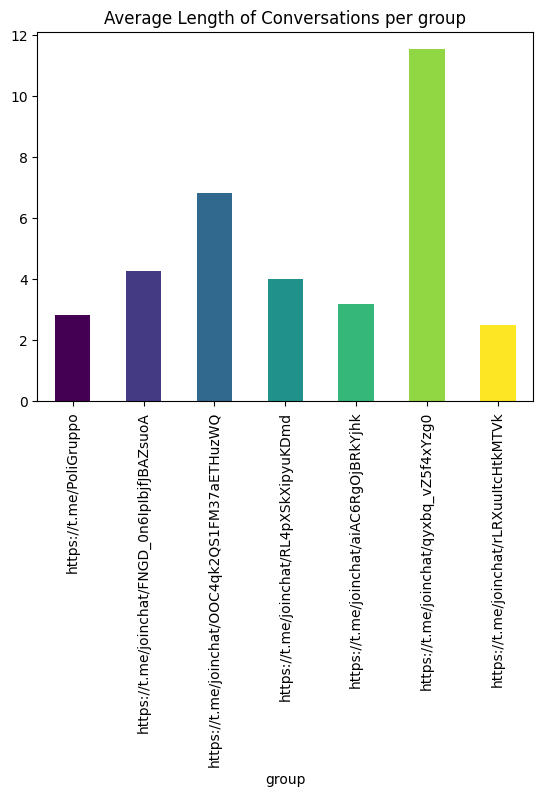

In [64]:
lengthofconversationspergroup.plot(kind='bar', title='Average Length of Conversations per group', color=colors)